Importing Library 

In [43]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [44]:
df = pd.read_csv('vgsales.csv')
df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


EDA (Exploratory Data Analysis)

In [45]:
df.shape

(16598, 11)

In [46]:
df.dtypes

Rank              int64
Name             object
Platform         object
Year            float64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object

Dropping irrelevent columns

In [47]:
df = df.drop(columns=['Year','Genre'], axis = 1)

In [48]:
df.head(1) 

,Rank,Name,Platform,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,Nintendo,41.49,29.02,3.77,8.46,82.74


In [49]:
drop_duplicate = df[df.duplicated()]
drop_duplicate

,Rank,Name,Platform,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales


In [50]:
df.count()

Rank            16598
Name            16598
Platform        16598
Publisher       16540
NA_Sales        16598
EU_Sales        16598
JP_Sales        16598
Other_Sales     16598
Global_Sales    16598
dtype: int64

In [51]:
df = df.drop_duplicates()
df.count()

Rank            16598
Name            16598
Platform        16598
Publisher       16540
NA_Sales        16598
EU_Sales        16598
JP_Sales        16598
Other_Sales     16598
Global_Sales    16598
dtype: int64

Cleaning/Removing/Dropping null values

In [52]:
df.isnull().sum()

Rank             0
Name             0
Platform         0
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
Global_Sales     0
dtype: int64

In [53]:
df.dropna() 
df.count()

Rank            16598
Name            16598
Platform        16598
Publisher       16540
NA_Sales        16598
EU_Sales        16598
JP_Sales        16598
Other_Sales     16598
Global_Sales    16598
dtype: int64

Checking Outliers

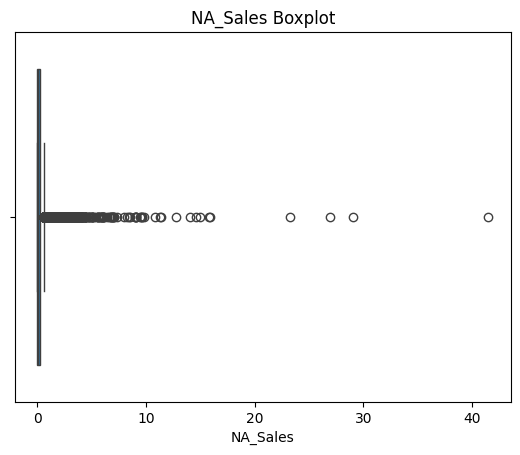

In [54]:
sns.boxplot(x='NA_Sales', data = df)
plt.title("NA_Sales Boxplot") 
plt.show()

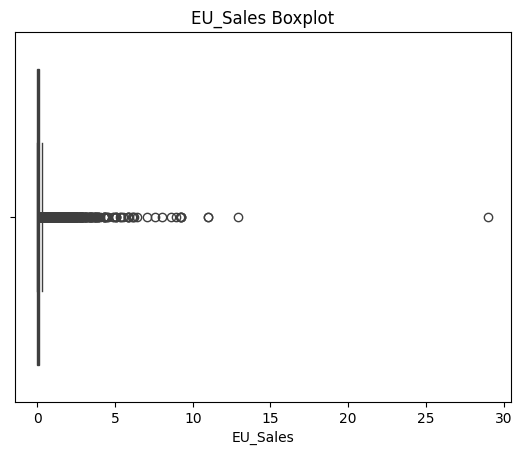

In [55]:
sns.boxplot(x='EU_Sales', data = df) 
plt.title("EU_Sales Boxplot") 
plt.show()

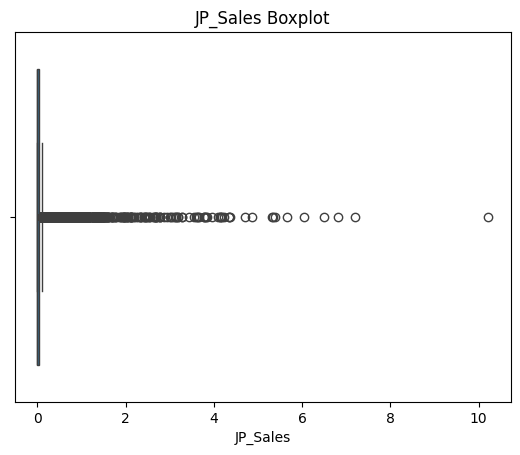

In [56]:
sns.boxplot(x='JP_Sales', data = df)
plt.title("JP_Sales Boxplot")
plt.show()

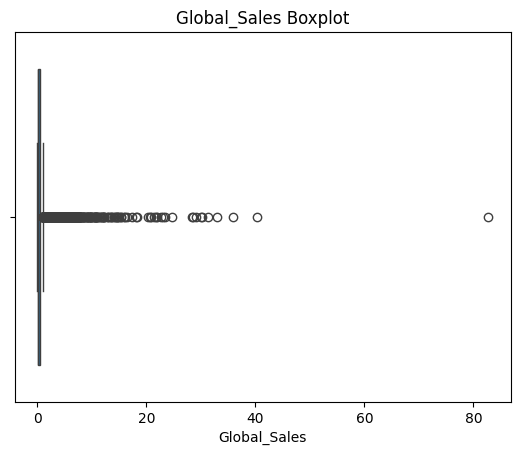

In [57]:
sns.boxplot(x='Global_Sales', data = df)
plt.title("Global_Sales Boxplot")
plt.show()

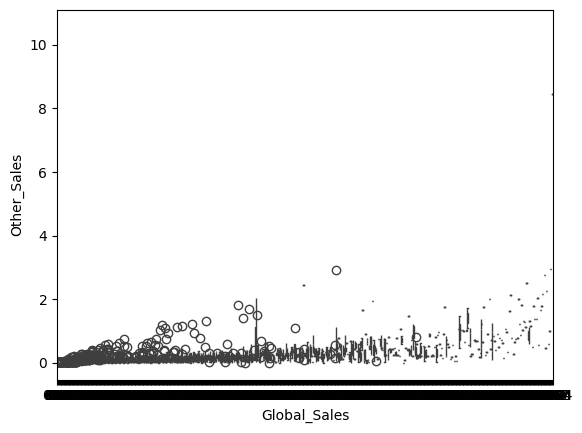

In [58]:
sns.boxplot(x='Global_Sales', y='Other_Sales', data = df)
plt.show()

Removing Outliers

In [59]:
q1 = df.select_dtypes( include= np.number).quantile(0.25)
q3 = df.select_dtypes( include= np.number).quantile(0.75)
iqr = q3 - q1
print(iqr)

Rank            8298.50
NA_Sales           0.24
EU_Sales           0.11
JP_Sales           0.04
Other_Sales        0.04
Global_Sales       0.41
dtype: float64


In [60]:
df = df[~(( df.select_dtypes(include = np.number) < (q1 - 1.5 * iqr)) | (df.select_dtypes(include = np.number) > (q3 + 1.5 * iqr))).any(axis = 1)]

In [61]:
q1 = df.select_dtypes( include= np.number).quantile(0.25)
q3 = df.select_dtypes( include= np.number).quantile(0.75)
iqr = q3 - q1
print(iqr)

Rank            6690.50
NA_Sales           0.15
EU_Sales           0.06
JP_Sales           0.01
Other_Sales        0.02
Global_Sales       0.20
dtype: float64


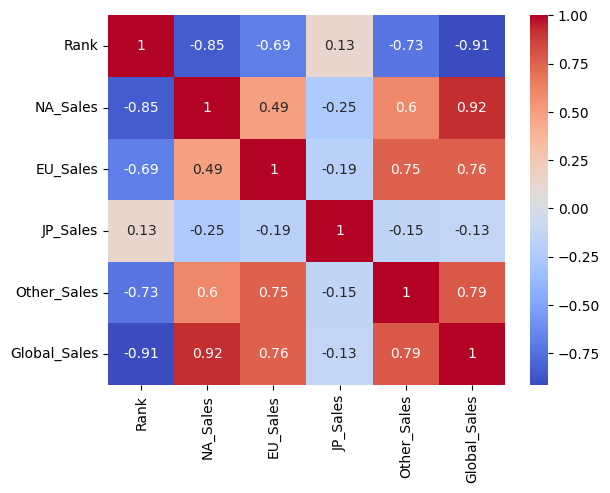

In [62]:
corr = df.corr(numeric_only=True)
sns.heatmap( corr, annot=True, cmap = 'coolwarm')
plt.show()

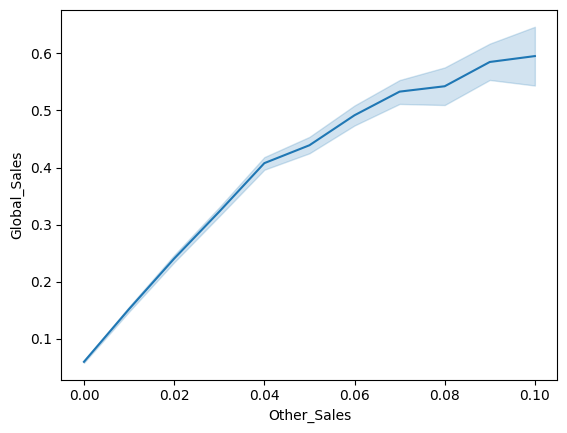

In [63]:
sns.lineplot(x='Other_Sales', y='Global_Sales', data=df)
plt.show()

PCA (Principal Component Analysis)

Preprocessing

In [64]:
from sklearn.preprocessing import StandardScaler 
from sklearn.decomposition import PCA  
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import confusion_matrix


In [65]:
df_numeric = df.select_dtypes(np.number)

In [66]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(df_numeric)
print(x_scaled)


[[-2.04080214  3.3758094   3.71386907  3.58802399  3.62231433  4.60862523]
 [-2.02882628  3.95394938  3.71386907 -0.46591727  3.62231433  4.48944216]
 [-2.02245614  3.95394938  3.37390313 -0.01547935  4.16370189  4.42985063]
 ...
 [ 1.62585078 -0.83635329 -0.70568816 -0.46591727 -0.70878614 -0.93338749]
 [ 1.62610559 -0.83635329 -0.53570519 -0.46591727 -0.70878614 -0.93338749]
 [ 1.62636039 -0.75376187 -0.70568816 -0.46591727 -0.70878614 -0.93338749]]


In [67]:
pca = PCA(n_components=2) 
X_pca = pca.fit_transform(x_scaled)
X_pca

array([[ 7.26382793,  4.40505116],
       [ 7.94309221,  0.37331697],
       [ 7.94955831,  0.84772332],
       ...,
       [-2.10161797, -0.75860996],
       [-2.03265027, -0.75603194],
       [-2.06607851, -0.7630259 ]], shape=(12018, 2))

In [70]:
X = df[['NA_Sales','EU_Sales','JP_Sales','Other_Sales']]
y = df['Global_Sales']


In [71]:

X_train,X_test,y_train,y_test = train_test_split(X_pca,y,) 
X_train


array([[ 4.36178037,  0.10621615],
       [ 4.40030499, -0.03749291],
       [ 0.46718357, -0.39568853],
       ...,
       [-2.00866763, -0.750328  ],
       [ 3.90922332, -0.07357668],
       [-1.68130527,  3.44065256]], shape=(9013, 2))

In [72]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(9013, 2)
(3005, 2)
(9013,)
(3005,)


In [79]:
X_test

array([[-0.04719226, -0.4707691 ],
       [ 1.11206349,  1.94527353],
       [-0.16526439, -0.48533052],
       ...,
       [ 3.77762162, -0.11296241],
       [-0.26264651, -0.48305908],
       [-0.71528704, -0.53789284]], shape=(3005, 2))

In [80]:
X_train

array([[ 4.36178037,  0.10621615],
       [ 4.40030499, -0.03749291],
       [ 0.46718357, -0.39568853],
       ...,
       [-2.00866763, -0.750328  ],
       [ 3.90922332, -0.07357668],
       [-1.68130527,  3.44065256]], shape=(9013, 2))

In [81]:
y_train

3991     0.50
3298     0.61
8089     0.18
11042    0.09
6745     0.25
         ... 
15180    0.02
11314    0.08
16393    0.01
3661     0.55
10829    0.09
Name: Global_Sales, Length: 9013, dtype: float64

In [82]:
y_test

8827     0.15
5897     0.30
9279     0.14
8390     0.17
10689    0.10
         ... 
9841     0.12
10070    0.11
3668     0.55
9535     0.13
11496    0.08
Name: Global_Sales, Length: 3005, dtype: float64